In [54]:
#install libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Optional: Set visual style
sns.set(style="whitegrid")


In [55]:
mental_health = pd.read_csv("data/depression_data.csv")

In [56]:
mental_health.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [57]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [58]:
mental_health.describe

<bound method NDFrame.describe of                     Name  Age Marital Status    Education Level  \
0       Christine Barker   31        Married  Bachelor's Degree   
1       Jacqueline Lewis   55        Married        High School   
2         Shannon Church   78        Widowed    Master's Degree   
3         Charles Jordan   58       Divorced    Master's Degree   
4           Michael Rich   18         Single        High School   
...                  ...  ...            ...                ...   
413763       Sean Miller   68        Married    Master's Degree   
413764   Christina Brown   26         Single  Bachelor's Degree   
413765   Matthew Jenkins   57        Married  Bachelor's Degree   
413766     Gary Faulkner   71        Married   Associate Degree   
413767    Joseph Johnson   62        Widowed    Master's Degree   

        Number of Children Smoking Status Physical Activity Level  \
0                        2     Non-smoker                  Active   
1                      

### DATA VISUALIZATION

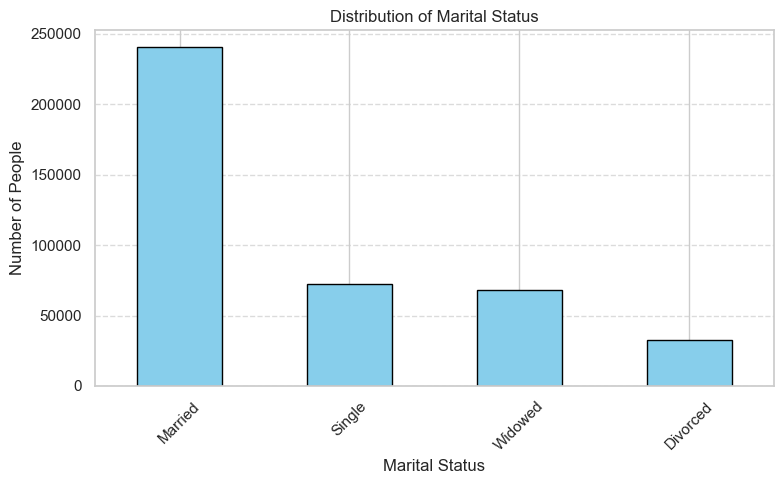

In [59]:

marital_counts = mental_health['Marital Status'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 5))
marital_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("outputs/figures/MaritrialStatus.png", dpi=300)
plt.show()


In [60]:
# Grouped mean income summaries
print("Mean Income by Marital Status:")
print(mental_health.groupby("Marital Status")["Income"].mean().sort_values(ascending=False))

print("\nMean Income by Education Level:")
print(mental_health.groupby("Education Level")["Income"].mean().sort_values(ascending=False))

print("\nMean Income by Employment Status:")
print(mental_health.groupby("Employment Status")["Income"].mean().sort_values(ascending=False))

print("\nMean Income by History of Mental Illness:")
print(mental_health.groupby("History of Mental Illness")["Income"].mean().sort_values(ascending=False))


Mean Income by Marital Status:
Marital Status
Divorced    54761.356733
Married     51897.319120
Single      48615.993046
Widowed     46518.374568
Name: Income, dtype: float64

Mean Income by Education Level:
Education Level
PhD                  104619.423814
Master's Degree       79246.024529
Bachelor's Degree     57610.063549
Associate Degree      37076.672191
High School           27208.474989
Name: Income, dtype: float64

Mean Income by Employment Status:
Employment Status
Employed      70526.047302
Unemployed    15031.594189
Name: Income, dtype: float64

Mean Income by History of Mental Illness:
History of Mental Illness
No     54335.500583
Yes    42254.452926
Name: Income, dtype: float64


C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\1388200333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mental_health, x='Employment Status', y='Income', palette='Set3')


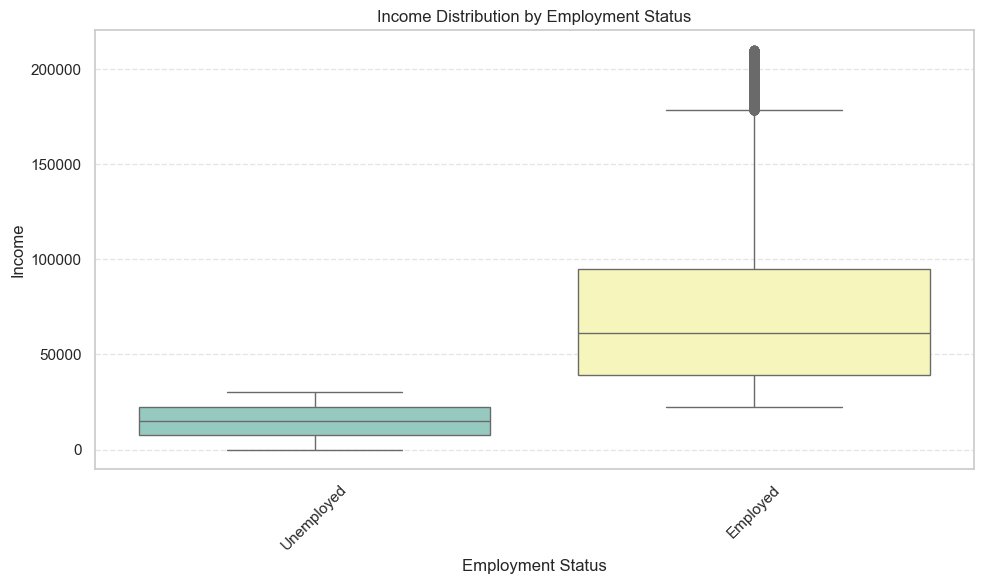

In [61]:
## MEAN INCOME DISTRIBUTION OF EMPLOYMENT STATUS
plt.figure(figsize=(10,6))
sns.boxplot(data=mental_health, x='Employment Status', y='Income', palette='Set3')
plt.title('Income Distribution by Employment Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig("outputs/figures/EmploymentStatus.png", dpi=300)
plt.show()


C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\3775329981.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mental_health, x='Employment Status', y='Income', estimator='mean', ci=None, palette='Set2')
C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\3775329981.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mental_health, x='Employment Status', y='Income', estimator='mean', ci=None, palette='Set2')


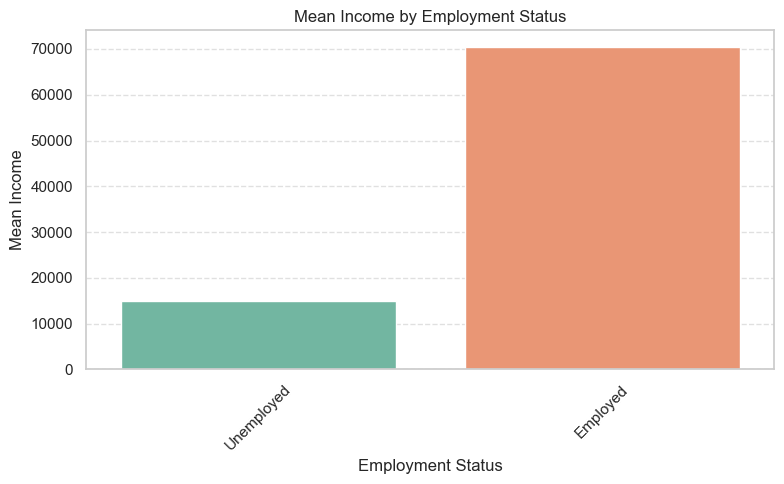

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=mental_health, x='Employment Status', y='Income', estimator='mean', ci=None, palette='Set2')
plt.title('Mean Income by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Mean Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("outputs/figures/EmploymentStatus2.png", dpi=300)
plt.show()

C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\2119966445.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mental_health, x='Marital Status', y='Income',estimator='mean', ci=None, palette='pastel')
C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\2119966445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mental_health, x='Marital Status', y='Income',estimator='mean', ci=None, palette='pastel')


<function matplotlib.pyplot.show(close=None, block=None)>

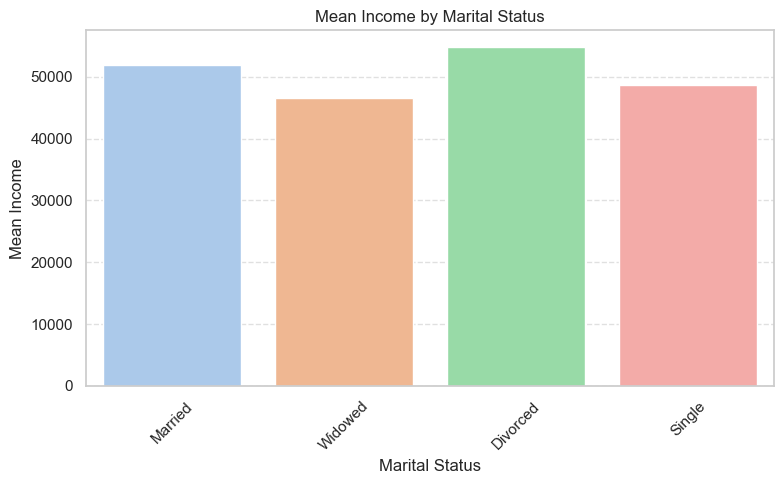

In [63]:
plt.figure(figsize=(8, 5))
sns.barplot(data=mental_health, x='Marital Status', y='Income',estimator='mean', ci=None, palette='pastel')
plt.title('Mean Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("outputs/figures/IncomeMaritalStatus.png", dpi=300)
plt.show


C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\2063680877.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mental_health, x='History of Mental Illness', y='Income', estimator='mean', ci=None, palette='coolwarm')
C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\2063680877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mental_health, x='History of Mental Illness', y='Income', estimator='mean', ci=None, palette='coolwarm')


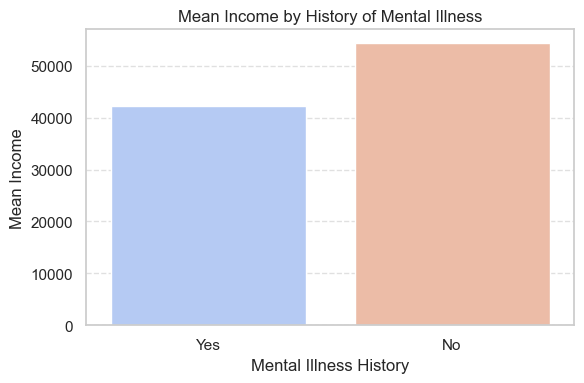

In [64]:
plt.figure(figsize=(6, 4))
sns.barplot(data=mental_health, x='History of Mental Illness', y='Income', estimator='mean', ci=None, palette='coolwarm')
plt.title('Mean Income by History of Mental Illness')
plt.xlabel('Mental Illness History')
plt.ylabel('Mean Income')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("outputs/figures/IncomeHistoryMentalIllness.png", dpi=300)
plt.show()

### ESTIMATE THE ECONOMIC COST OF MENTAL DISABILITIES.

In [65]:
# Mean income for both groups
mean_income = mental_health.groupby('History of Mental Illness')['Income'].mean()
lost_income_per_person = mean_income['No'] - mean_income['Yes']

print("Mean Income (No Mental Illness):", mean_income['No'])
print("Mean Income (With Mental Illness):", mean_income['Yes'])
print("Lost Income per Person:", lost_income_per_person)


Mean Income (No Mental Illness): 54335.500583240435
Mean Income (With Mental Illness): 42254.45292612756
Lost Income per Person: 12081.047657112875


In [66]:
# Count how many people have mental illness
num_with_mental_illness = mental_health[mental_health['History of Mental Illness'] == 'Yes'].shape[0]

# Aggregate lost income
aggregate_lost_income = lost_income_per_person * num_with_mental_illness

print("Total People with Mental Illness:", num_with_mental_illness)
print("Aggregate Lost Income:", aggregate_lost_income)


Total People with Mental Illness: 125825
Aggregate Lost Income: 1520097821.4562275


In [67]:
# Count how many people have NO mental illness
num_with_mental_illness = mental_health[mental_health['History of Mental Illness'] == 'No'].shape[0]



print("Total People with NO Mental Illness:", num_with_mental_illness)

Total People with NO Mental Illness: 287943


In [68]:
# Filter people with and without mental illness
grouped = mental_health.groupby(['History of Mental Illness', 'Employment Status']).size().unstack(fill_value=0)

# Calculate employment rate
employment_rate = grouped.div(grouped.sum(axis=1), axis=0)
employment_rate_diff = employment_rate.loc['No', 'Employed'] - employment_rate.loc['Yes', 'Employed']

print("Employment Rate (No Mental Illness):", employment_rate.loc['No', 'Employed'])
print("Employment Rate (With Mental Illness):", employment_rate.loc['Yes', 'Employed'])
print("Employment Rate Drop Due to Mental Illness:", employment_rate_diff)


Employment Rate (No Mental Illness): 0.6866567341452996
Employment Rate (With Mental Illness): 0.539964236042122
Employment Rate Drop Due to Mental Illness: 0.14669249810317764


###  identify the combination of factors that contribute to mental illness. 

In [69]:
# Convert target to binary
mental_health['Mental_Illness_Binary'] = mental_health['History of Mental Illness'].map({'Yes': 1, 'No': 0})

# Select potential predictors
factors = [
    'Age', 'Marital Status', 'Education Level', 'Number of Children',
    'Smoking Status', 'Physical Activity Level', 'Employment Status',
    'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
    'History of Substance Abuse', 'Family History of Depression',
    'Chronic Medical Conditions'
]

X = mental_health[factors]
y = mental_health['Mental_Illness_Binary']


In [70]:
# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


C:\Users\MICROSPACE\.conda\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MICROSPACE\.conda\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.70      1.00      0.82     86319
           1       0.00      0.00      0.00     37812

    accuracy                           0.70    124131
   macro avg       0.35      0.50      0.41    124131
weighted avg       0.48      0.70      0.57    124131



C:\Users\MICROSPACE\.conda\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
# Feature importance from logistic regression coefficients
importance = pd.Series(model.coef_[0], index=X_encoded.columns)
top_factors = importance.sort_values(ascending=False)

print("Top Positive Contributors to Mental Illness Risk:")
print(top_factors.head(10))

print("\nTop Protective Factors (Negative Contribution):")
print(top_factors.tail(10))


Top Positive Contributors to Mental Illness Risk:
Employment Status_Unemployed        0.630889
Marital Status_Single               0.035237
Marital Status_Married              0.025400
Dietary Habits_Unhealthy            0.023892
Family History of Depression_Yes    0.013661
Dietary Habits_Moderate             0.013321
Sleep Patterns_Poor                 0.010313
History of Substance Abuse_Yes      0.009657
Number of Children                  0.003810
Alcohol Consumption_Low             0.002971
dtype: float64

Top Protective Factors (Negative Contribution):
Physical Activity Level_Sedentary   -0.000835
Marital Status_Widowed              -0.002100
Education Level_High School         -0.006136
Physical Activity Level_Moderate    -0.006486
Sleep Patterns_Good                 -0.015213
Smoking Status_Non-smoker           -0.031928
Smoking Status_Former               -0.038310
Education Level_Master's Degree     -0.263589
Education Level_Bachelor's Degree   -0.267028
Education Level_PhD   

C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\2499611643.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined.values, y=combined.index, palette='coolwarm')


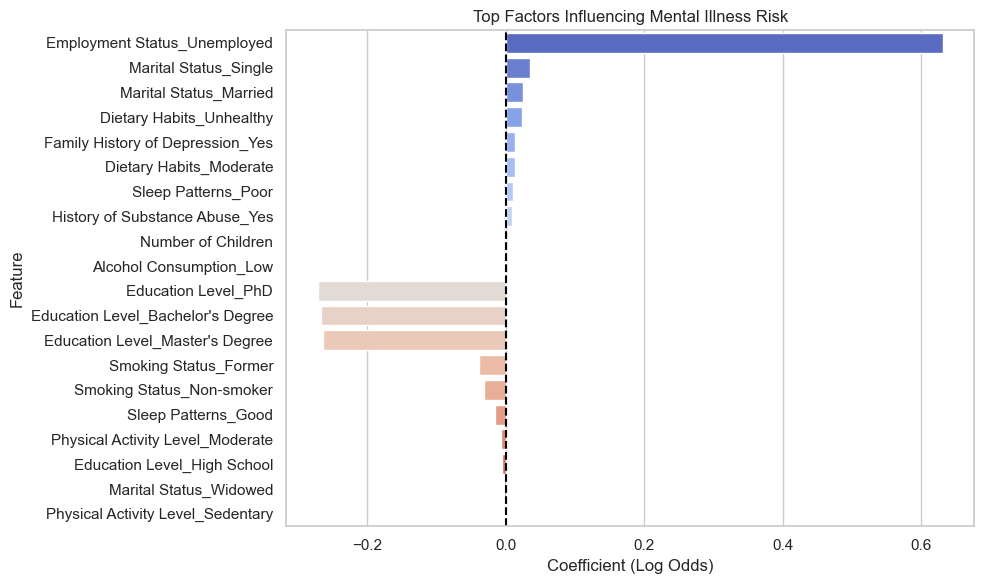

In [73]:
### VISUALIZING THE CHARTS

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have 'importance' from:
# importance = pd.Series(model.coef_[0], index=X_encoded.columns)

# Select top 10 positive and negative contributors
top_positive = importance.sort_values(ascending=False).head(10)
top_negative = importance.sort_values().head(10)

# Combine both
combined = pd.concat([top_positive, top_negative])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=combined.values, y=combined.index, palette='coolwarm')
plt.title('Top Factors Influencing Mental Illness Risk')
plt.xlabel('Coefficient (Log Odds)')
plt.ylabel('Feature')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


In [74]:
print("Age" in X_encoded.columns)


True


In [75]:
print(mental_health['Age'].describe())
print(mental_health['Age'].isnull().sum())


count    413768.000000
mean         49.000713
std          18.158759
min          18.000000
25%          33.000000
50%          49.000000
75%          65.000000
max          80.000000
Name: Age, dtype: float64
0


In [76]:
print("Age coefficient:", importance['Age'])


Age coefficient: 0.00022323880753056057


In [77]:
# Choose your features — make sure 'Age' is included
features = [
    'Age', 'Marital Status', 'Education Level', 'Number of Children',
    'Smoking Status', 'Physical Activity Level', 'Employment Status',
    'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
    'History of Substance Abuse', 'Family History of Depression',
    'Chronic Medical Conditions'
]

X = mental_health[features]
y = mental_health['Mental_Illness_Binary']  # 1 = Yes, 0 = No

# Convert categorical variables to dummy variables
X_encoded = pd.get_dummies(X, drop_first=True)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get importance (coefficients)
importance = pd.Series(model.coef_[0], index=X_encoded.columns)

# Sort by importance
importance_sorted = importance.sort_values(ascending=False)

# Display
print(importance_sorted)


Employment Status_Unemployed         0.630889
Marital Status_Single                0.035237
Marital Status_Married               0.025400
Dietary Habits_Unhealthy             0.023892
Family History of Depression_Yes     0.013661
Dietary Habits_Moderate              0.013321
Sleep Patterns_Poor                  0.010313
History of Substance Abuse_Yes       0.009657
Number of Children                   0.003810
Alcohol Consumption_Low              0.002971
Alcohol Consumption_Moderate         0.001847
Age                                  0.000223
Chronic Medical Conditions_Yes       0.000155
Physical Activity Level_Sedentary   -0.000835
Marital Status_Widowed              -0.002100
Education Level_High School         -0.006136
Physical Activity Level_Moderate    -0.006486
Sleep Patterns_Good                 -0.015213
Smoking Status_Non-smoker           -0.031928
Smoking Status_Former               -0.038310
Education Level_Master's Degree     -0.263589
Education Level_Bachelor's Degree 

In [78]:
import numpy as np
import pandas as pd

# Get coefficients and feature names
coefficients = model.coef_[0]
feature_names = X_encoded.columns

# Calculate odds ratios
odds_ratios = np.exp(coefficients)

# Create a DataFrame
results_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': np.round(coefficients, 4),
    'Odds Ratio': np.round(odds_ratios, 4)
})

# Sort by absolute size of coefficients (optional, for clarity)
results_df = results_df.reindex(results_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the table
print(results_df)

# Save to CSV (optional)
# results_df.to_csv("logistic_regression_odds_ratios.csv", index=False)


                              Feature  Coefficient  Odds Ratio
13       Employment Status_Unemployed       0.6309      1.8793
8                 Education Level_PhD      -0.2717      0.7621
5   Education Level_Bachelor's Degree      -0.2670      0.7657
7     Education Level_Master's Degree      -0.2636      0.7683
9               Smoking Status_Former      -0.0383      0.9624
3               Marital Status_Single       0.0352      1.0359
10          Smoking Status_Non-smoker      -0.0319      0.9686
2              Marital Status_Married       0.0254      1.0257
17           Dietary Habits_Unhealthy       0.0239      1.0242
18                Sleep Patterns_Good      -0.0152      0.9849
21   Family History of Depression_Yes       0.0137      1.0138
16            Dietary Habits_Moderate       0.0133      1.0134
19                Sleep Patterns_Poor       0.0103      1.0104
20     History of Substance Abuse_Yes       0.0097      1.0097
11   Physical Activity Level_Moderate      -0.0065     

C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\2406743881.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined.values, y=combined.index, palette='coolwarm')


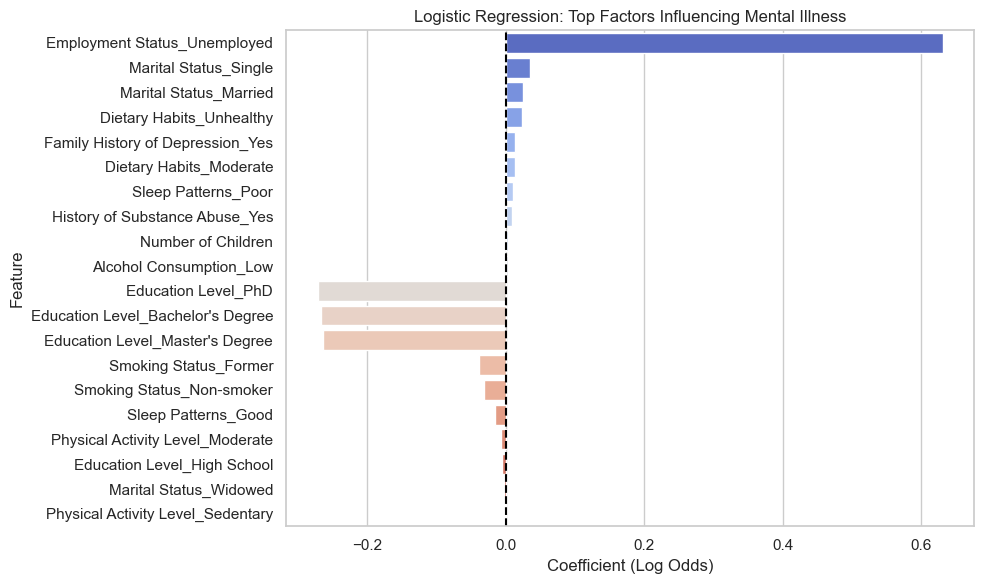

In [79]:
### VISUALIZING THE CHARTS

import matplotlib.pyplot as plt
import seaborn as sns
importance = pd.Series(model.coef_[0], index=X_encoded.columns)

import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 positive and negative coefficients
top_positive = importance.sort_values(ascending=False).head(10)
top_negative = importance.sort_values().head(10)

# Combine for plotting
combined = pd.concat([top_positive, top_negative])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=combined.values, y=combined.index, palette='coolwarm')
plt.axvline(0, color='black', linestyle='--')
plt.title("Logistic Regression: Top Factors Influencing Mental Illness")
plt.xlabel("Coefficient (Log Odds)")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("outputs/figures/logisticRegression.png", dpi=300)
plt.show()


### PREDICTING MENTAL ILLNESS


In [80]:
y_pred_class = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1 (mental illness)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")


C:\Users\MICROSPACE\.conda\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MICROSPACE\.conda\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.70      1.00      0.82     86319
           1       0.00      0.00      0.00     37812

    accuracy                           0.70    124131
   macro avg       0.35      0.50      0.41    124131
weighted avg       0.48      0.70      0.57    124131

ROC AUC Score: 0.59


C:\Users\MICROSPACE\.conda\envs\ds_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### PREDICT FOR A NEW INDIVIDUAL

In [81]:
new_person = pd.DataFrame([{
    'Age': 25,
    'Marital Status': 'Married',
    'Education Level': 'Bachelor',
    'Number of Children': 0,
    'Smoking Status': 'Non-smoker',
    'Physical Activity Level': 'Moderate',
    'Employment Status': 'Employed',
    'Alcohol Consumption': 'Low',
    'Dietary Habits': 'Healthy',
    'Sleep Patterns': 'Regular',
    'History of Substance Abuse': 'No',
    'Family History of Depression': 'Yes',
    'Chronic Medical Conditions': 'No'
}])

# Convert to same format as training data
new_encoded = pd.get_dummies(new_person)
new_encoded = new_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Predict
prediction = model.predict(new_encoded)
probability = model.predict_proba(new_encoded)[:, 1]

print("Predicted Mental Illness:", prediction[0])
print("Probability of Mental Illness:", probability[0])


Predicted Mental Illness: 0
Probability of Mental Illness: 0.27800040456116504


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 1. Use the same feature set and one-hot encoding
X = mental_health[features]
y = mental_health['Mental_Illness_Binary']

X_encoded = pd.get_dummies(X, drop_first=True)

# 2. Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

# 3. Train Random Forest with class_weight='balanced' to handle imbalance
rf_model = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

# 4. Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]

# 5. Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc = roc_auc_score(y_test, y_pred_rf_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.74     86319
           1       0.33      0.26      0.29     37812

    accuracy                           0.61    124131
   macro avg       0.52      0.51      0.51    124131
weighted avg       0.59      0.61      0.60    124131

ROC AUC Score: 0.54


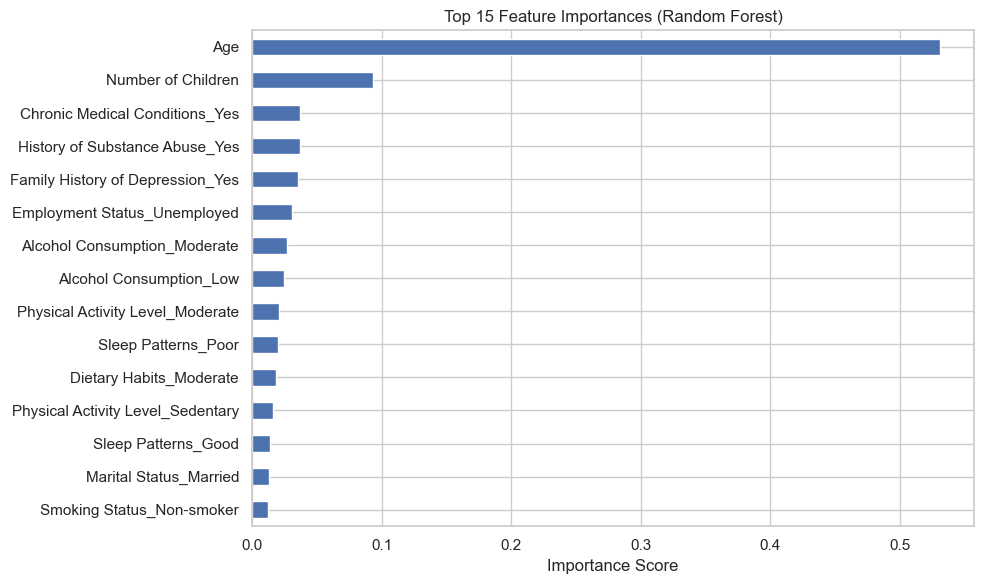

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance
importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
importances_sorted = importances.sort_values(ascending=False)[:15]  # top 15

# Plot
plt.figure(figsize=(10, 6))
importances_sorted.plot(kind='barh')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### PREDICTING INCOME BY COMBINATION OF FACTORS

In [ ]:
# Set your predictors (exclude 'Income' itself)
features = [
    'Age', 'Marital Status', 'Education Level', 'Number of Children',
    'Smoking Status', 'Physical Activity Level', 'Employment Status',
    'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
    'History of Substance Abuse', 'Family History of Depression',
    'Chronic Medical Conditions', 'Mental_Illness_Binary'
]

X = mental_health[features]
y = mental_health['Income']  # Target variable is now income

# Convert categorical features to dummy variables
X_encoded = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict
y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")


In [ ]:
print("Script finished running!")
print("Sample Predictions:", y_pred[:5])


In [ ]:
### VISUALIZING IMPORTANT FEATURES IN PREDICTION
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(rf_regressor.feature_importances_, index=X_encoded.columns)
top_features = importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 15 Feature Importances for Income Prediction")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select features and target
features = [
    'Age', 'Marital Status', 'Education Level', 'Number of Children',
    'Smoking Status', 'Physical Activity Level', 'Employment Status',
    'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
    'History of Substance Abuse', 'Family History of Depression',
    'Chronic Medical Conditions', 'Mental_Illness_Binary'
]

# Make sure all these columns exist in your DataFrame
# and 'Income' is your target
X = mental_health[features].copy()
y = mental_health['Income'].copy()

# Step 2: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

# Step 4: Train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf_regressor.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Step 7: (Optional) Feature importance
importances = pd.Series(rf_regressor.feature_importances_, index=X_encoded.columns)
top_features = importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 15 Feature Importances for Income Prediction")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assume you already have:
# - X_encoded: one-hot encoded features
# - y: target variable (0 = No, 1 = Yes)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train Decision Tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # use max_depth to control complexity
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assume you already have:
# - X_encoded: one-hot encoded features
# - y: target variable (0 = No, 1 = Yes)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train Decision Tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # use max_depth to control complexity
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

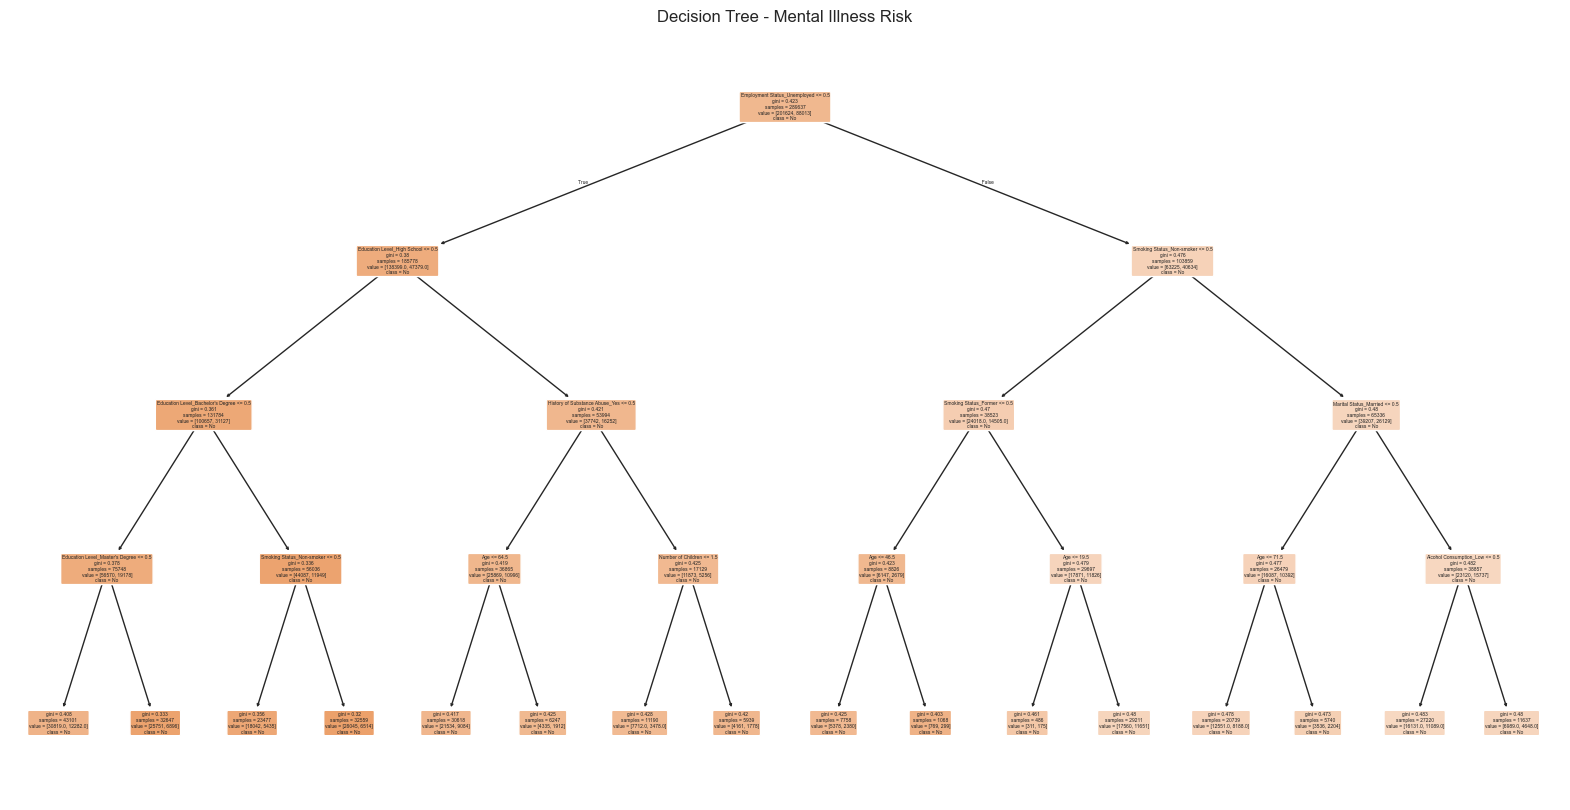

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X_encoded.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree - Mental Illness Risk")
plt.savefig("outputs/figures/DecisionTree1.png", dpi=300)
plt.show()


### Economic Impact Using Machine Learning

In [31]:
###
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features (same as before)
X = X_encoded
y = mental_health['Income']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree Regression
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Evaluation
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Decision Tree R²:", r2_score(y_test, y_pred_tree))


Linear Regression R²: 0.725493071010249
Decision Tree R²: 0.8505091626526144


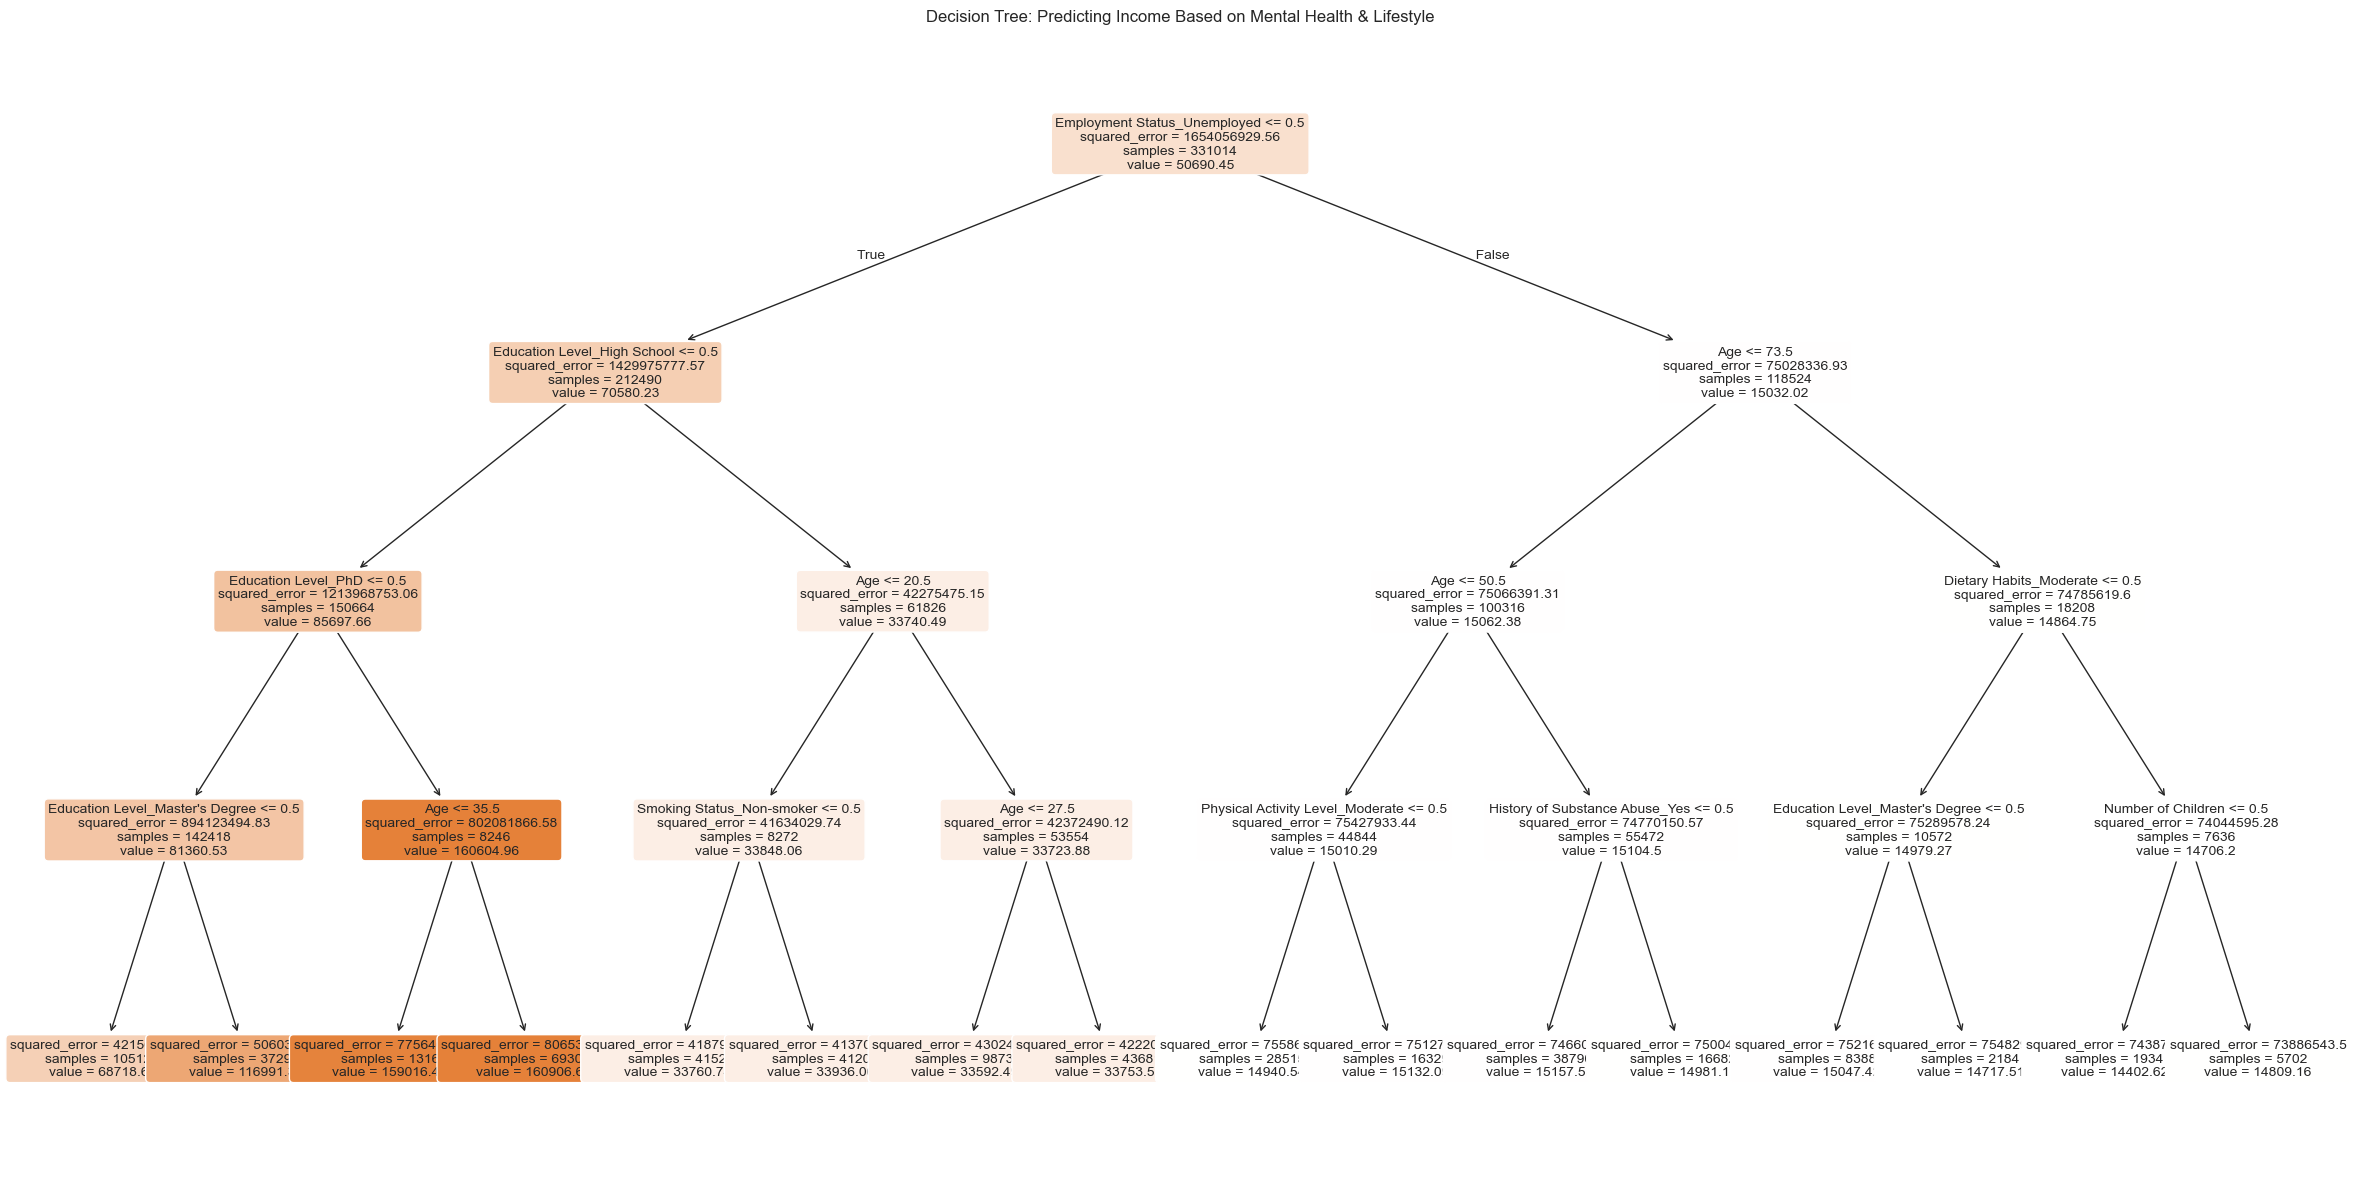

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(24, 12))  # Adjust size for readability

# Plot the tree
plot_tree(tree, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          fontsize=10, 
          precision=2)

# Save or display
plt.title("Decision Tree: Predicting Income Based on Mental Health & Lifestyle")
plt.tight_layout()
plt.savefig("outputs/figures/DecisionTree2.png", dpi=300)
plt.show()


### Map Hidden Cost by Risk Factors

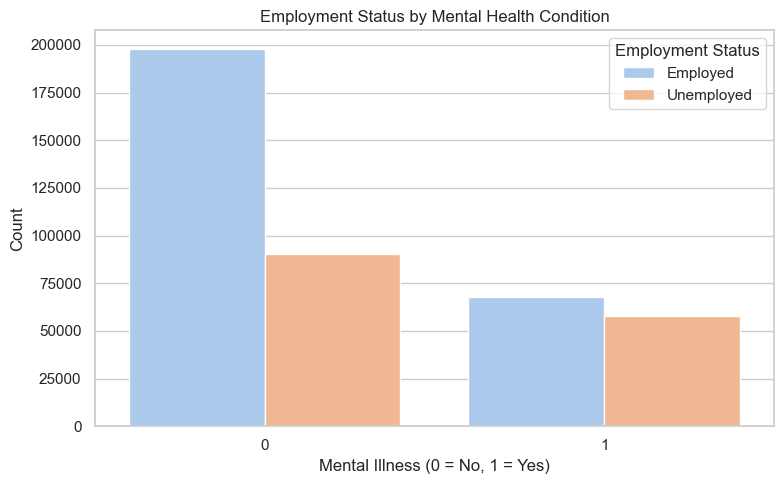

In [33]:
##  Mental Illness vs. Employment Status
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=mental_health, x='Mental_Illness_Binary', hue='Employment Status', palette='pastel')
plt.title('Employment Status by Mental Health Condition')
plt.xlabel('Mental Illness (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Employment Status')
plt.tight_layout()
plt.savefig("outputs/figures/EmploymentvsIncome.png", dpi=300)
plt.show()

C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\2865307691.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mental_health, x='Mental_Illness_Binary', y='Income', palette='coolwarm')


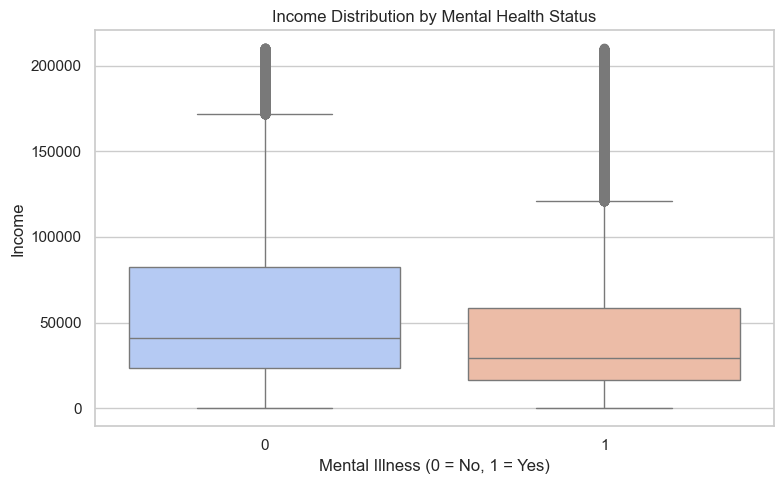

In [34]:
### Mental Health vs. Income

plt.figure(figsize=(8, 5))
sns.boxplot(data=mental_health, x='Mental_Illness_Binary', y='Income', palette='coolwarm')
plt.title('Income Distribution by Mental Health Status')
plt.xlabel('Mental Illness (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.tight_layout()
plt.savefig("outputs/figures/IncomeByMental.png", dpi=300)
plt.show()

### Risk Factor Combinations that Affect Earnings

C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\287038266.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='MH_Sleep_Combo', y='Income', palette='viridis')


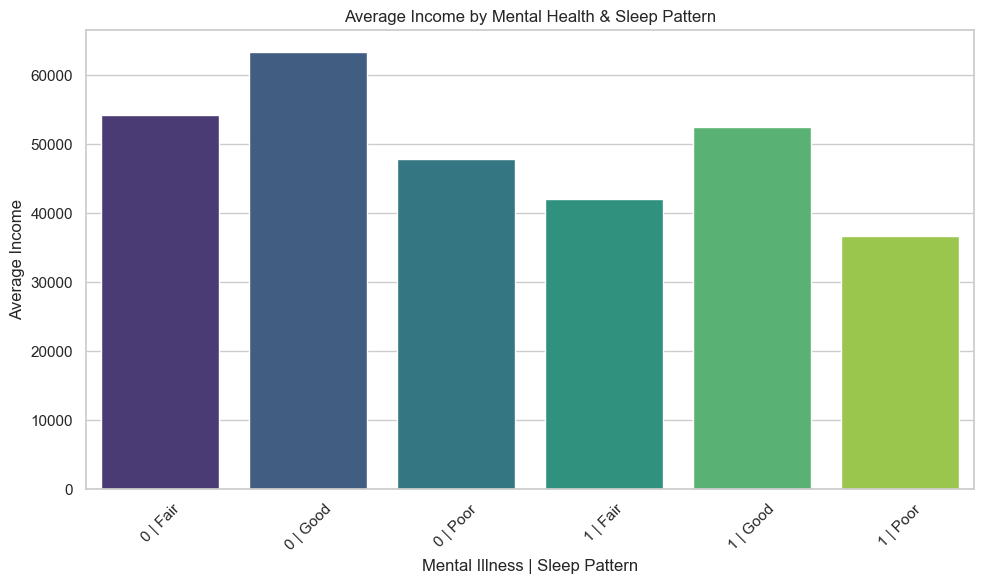

In [35]:
mental_health['MH_Sleep_Combo'] = mental_health['Mental_Illness_Binary'].astype(str) + " | " + mental_health['Sleep Patterns']

grouped = mental_health.groupby('MH_Sleep_Combo')['Income'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='MH_Sleep_Combo', y='Income', palette='viridis')
plt.title('Average Income by Mental Health & Sleep Pattern')
plt.xticks(rotation=45)
plt.ylabel('Average Income')
plt.xlabel('Mental Illness | Sleep Pattern')
plt.tight_layout()
plt.savefig("outputs/figures/IncomebyMentalSleep.png", dpi=300)
plt.show()



C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\1221134835.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_alcohol, x='MH_Alcohol_Combo', y='Income', palette='mako')


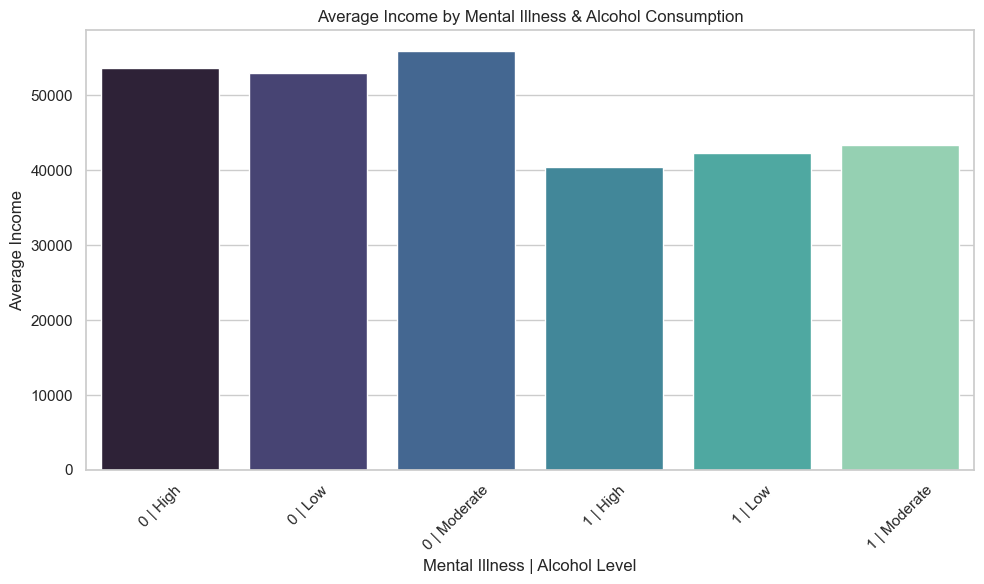

In [36]:
##Alcohol Consumption & Income
mental_health['MH_Alcohol_Combo'] = mental_health['Mental_Illness_Binary'].astype(str) + " | " + mental_health['Alcohol Consumption']

grouped_alcohol = mental_health.groupby('MH_Alcohol_Combo')['Income'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_alcohol, x='MH_Alcohol_Combo', y='Income', palette='mako')
plt.title('Average Income by Mental Illness & Alcohol Consumption')
plt.xticks(rotation=45)
plt.ylabel('Average Income')
plt.xlabel('Mental Illness | Alcohol Level')
plt.tight_layout()
plt.savefig("outputs/figures/IncomeMentalAlcohol.png", dpi=300)
plt.show()



C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\2392414022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_substance, x='MH_Substance_Combo', y='Income', palette='rocket')


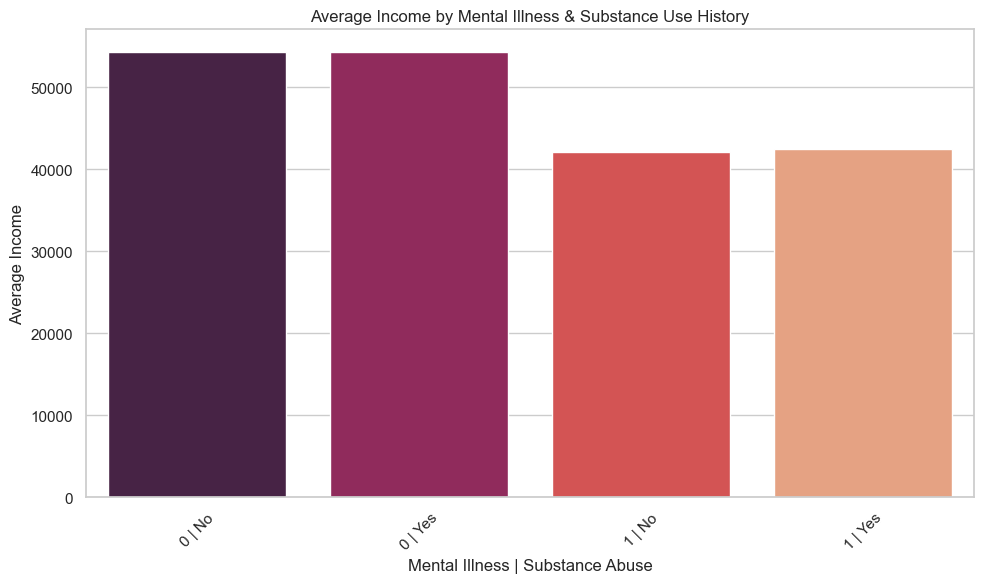

In [37]:
##Substance use & Income
mental_health['MH_Substance_Combo'] = mental_health['Mental_Illness_Binary'].astype(str) + " | " + mental_health['History of Substance Abuse']

grouped_substance = mental_health.groupby('MH_Substance_Combo')['Income'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_substance, x='MH_Substance_Combo', y='Income', palette='rocket')
plt.title('Average Income by Mental Illness & Substance Use History')
plt.xticks(rotation=45)
plt.ylabel('Average Income')
plt.xlabel('Mental Illness | Substance Abuse')
plt.tight_layout()
plt.savefig("outputs/figures/IncomeMentalSubstance.png", dpi=300)
plt.show()

C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\2457038750.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_fh, x='MH_FamilyHistory_Combo', y='Income', palette='coolwarm')


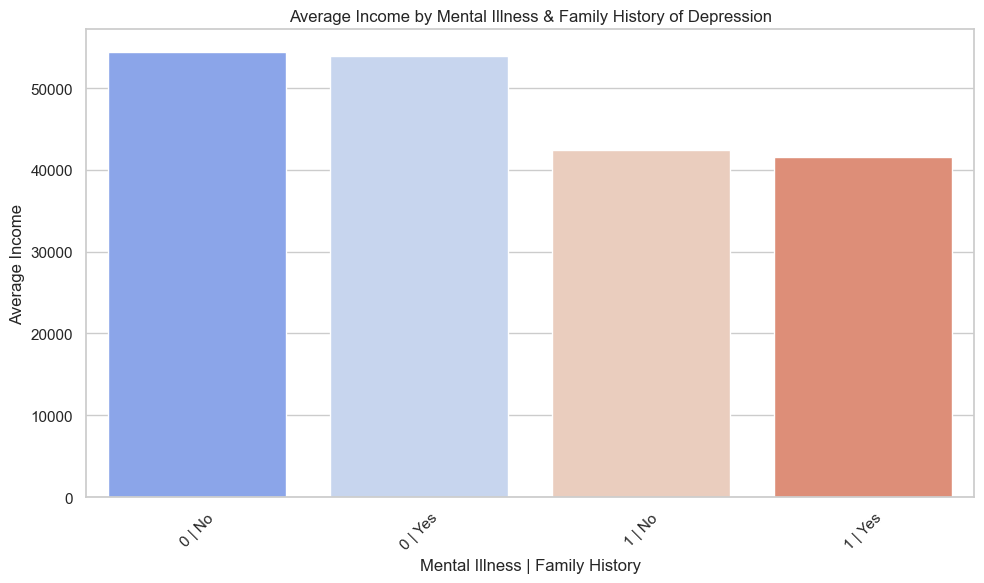

In [38]:
###Income by Mental Illness & Family History
mental_health['MH_FamilyHistory_Combo'] = mental_health['Mental_Illness_Binary'].astype(str) + " | " + mental_health['Family History of Depression']

grouped_fh = mental_health.groupby('MH_FamilyHistory_Combo')['Income'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_fh, x='MH_FamilyHistory_Combo', y='Income', palette='coolwarm')
plt.title('Average Income by Mental Illness & Family History of Depression')
plt.xlabel('Mental Illness | Family History')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/figures/IncomeMentalDepression.png", dpi=300)
plt.show()

C:\Users\MICROSPACE\AppData\Local\Temp\ipykernel_30452\3770914901.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_chronic, x='MH_Chronic_Combo', y='Income', palette='YlOrRd')


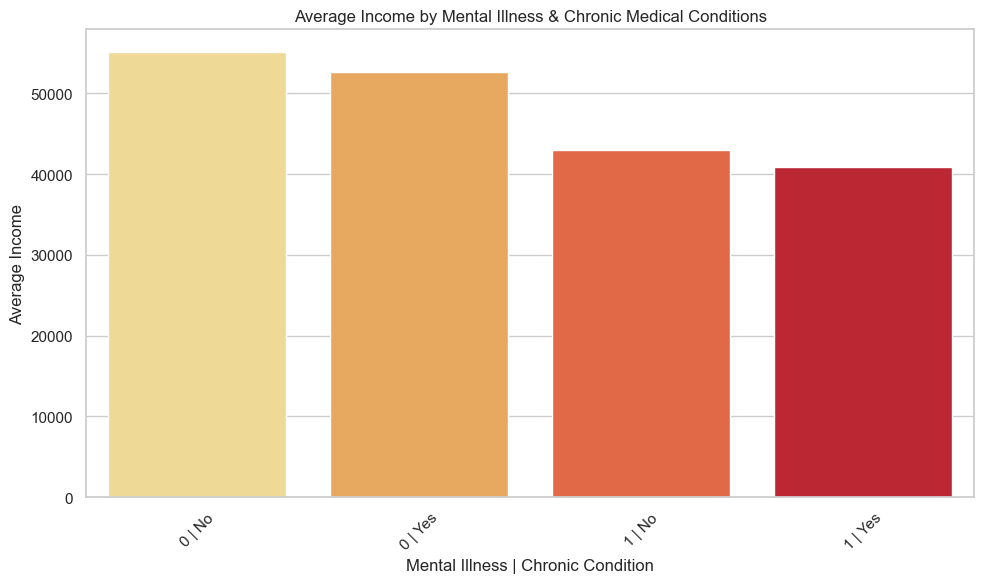

In [39]:
##Chronic Medical Conditions & Income
mental_health['MH_Chronic_Combo'] = mental_health['Mental_Illness_Binary'].astype(str) + " | " + mental_health['Chronic Medical Conditions']

grouped_chronic = mental_health.groupby('MH_Chronic_Combo')['Income'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_chronic, x='MH_Chronic_Combo', y='Income', palette='YlOrRd')
plt.title('Average Income by Mental Illness & Chronic Medical Conditions')
plt.xlabel('Mental Illness | Chronic Condition')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("outputs/figures/IncomeMentalChronic.png", dpi=300)
plt.show()


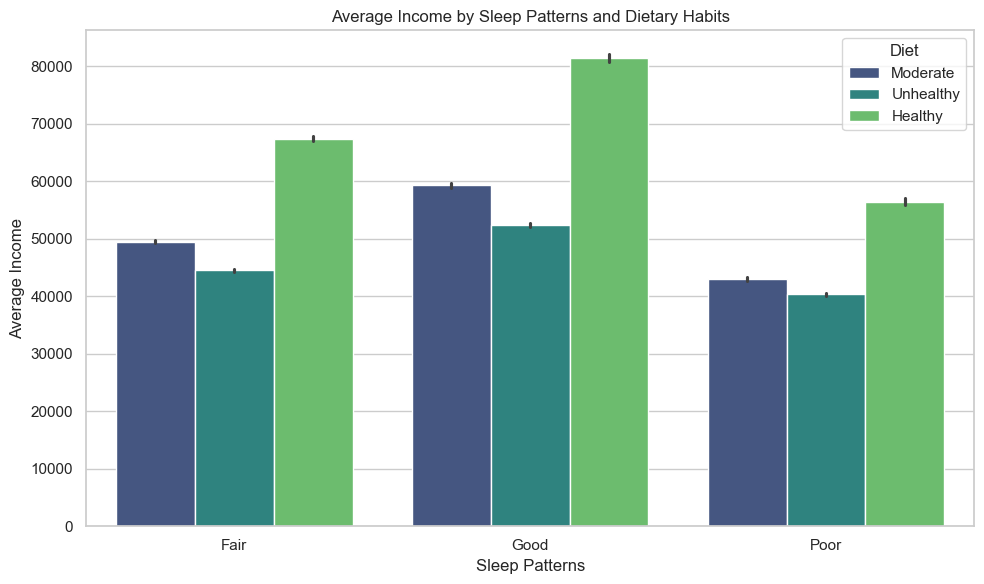

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=mental_health,
            x='Sleep Patterns',
            y='Income',
            hue='Dietary Habits',
            palette='viridis')

plt.title('Average Income by Sleep Patterns and Dietary Habits')
plt.ylabel('Average Income')
plt.xlabel('Sleep Patterns')
plt.legend(title='Diet')
plt.tight_layout()
plt.savefig("outputs/figures/IncomeSleepDietary.png", dpi=300)
plt.show()


### Create a Risk Score / Economic Burden Index

In [41]:
mental_health['risk_score'] = (
     mental_health['Mental_Illness_Binary'] +
    (mental_health['History of Substance Abuse'] == 'Yes').astype(int) +
    (mental_health['Chronic Medical Conditions'] == 'Yes').astype(int) +
    (mental_health['Sleep Patterns'] == 'Poor').astype(int) +
    (mental_health['Dietary Habits'] == 'Unhealthy').astype(int) +
    (mental_health['Employment Status'] == 'Unemployed').astype(int)
)


In [42]:
def categorize_risk(score):
    if score <= 1:
        return 'Low'
    elif score <= 3:
        return 'Moderate'
    else:
        return 'High'


mental_health['burden_group'] = mental_health['risk_score'].apply(categorize_risk)



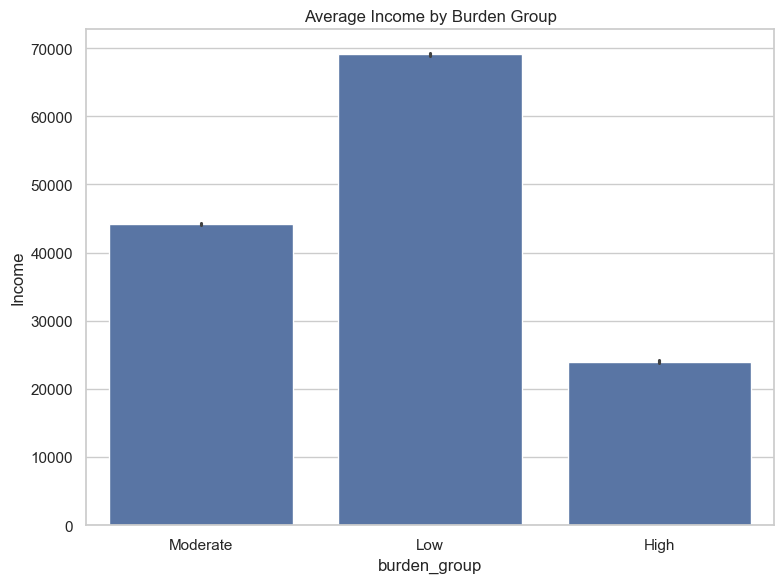

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(data=mental_health, x='burden_group', y='Income')
plt.title("Average Income by Burden Group")
plt.tight_layout()

# Save first
plt.savefig("outputs/figures/Economicburden.png", dpi=300)

# Then show
plt.show()


In [44]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Create output folder
os.makedirs("outputs/figures", exist_ok=True)


